# Arthritis prediction

## 1. Import packages and data

In [1]:
# import packages
import numpy as np
import pandas as pd

from scipy.io import arff

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer

# import the package for hypothesis test
from scipy import stats

from sklearn.preprocessing import StandardScaler

# models will be created using six algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

#feature select methods
from sklearn.feature_selection import RFE, SelectFromModel, SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, \
     confusion_matrix, ConfusionMatrixDisplay, classification_report


In [2]:
# import data
data = arff.loadarff('project-2018-BRFSS-arthritis.arff')
df0 = pd.DataFrame(data[0])
df0.head()

,x.aidtst3,employ1,income2,weight2,height3,children,veteran3,blind,renthom1,sex1,...,x.denvst3,x.prace1,x.mrace1,x.exteth3,x.asthms1,x.michd,x.ltasth1,x.casthm1,x.state,havarth3
0,b'2',1.0,8.0,138.0,504.0,2.0,b'2',b'2',b'1',b'2',...,b'1',1.0,1.0,b'1',b'3',b'2',b'1',b'1',27.0,b'2'
1,b'1',1.0,4.0,240.0,600.0,88.0,b'2',b'1',b'2',b'1',...,b'2',1.0,1.0,b'2',b'3',b'2',b'1',b'1',72.0,b'2'
2,b'1',1.0,6.0,120.0,504.0,88.0,b'2',b'2',b'1',b'2',...,b'1',6.0,6.0,b'2',b'3',b'2',b'1',b'1',31.0,b'2'
3,b'2',7.0,77.0,133.0,502.0,88.0,b'2',b'2',b'1',b'2',...,b'1',1.0,1.0,b'2',b'3',b'2',b'1',b'1',45.0,b'2'
4,b'9',7.0,8.0,170.0,505.0,88.0,b'2',b'2',b'1',b'2',...,b'1',1.0,1.0,b'1',b'3',b'2',b'1',b'1',24.0,b'2'


## 2. EDA (Initial EDA and data cleaning)

In [3]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

**Feature selection**

We selected the following 17 caculated variables. The common focus of these variables is on health behaviors that are associated with a risk of illness or injury. 

In [4]:
# selected features
selected_cols =['x.rfhlth',
                'x.phys14d',
                'x.ment14d',
                'x.hcvu651',
                'x.totinda',
                'x.michd',
                'x.asthms1',
                'havarth3',
                'x.exteth3',
                'x.prace1',
                'x.ageg5yr',
                'x.bmi5cat',
                'x.rfsmok3',
                'x.drnkwek',
                'flushot6',
                'x.rfseat2',
                'sex1'
               ]

**rename columns**   

Rename the column with more descriptive names for better readability and ensuring consistent column names throughout the analysis.


In [5]:
# rename the variables for better understanding and readability
name_dict= {'x.rfhlth': 'health_status',
            'x.phys14d': 'physical_health',
            'x.ment14d': 'mental_health',
            'x.hcvu651': 'healthcare_access',
            'x.totinda': 'exercise',
            'x.michd': 'heart_or_mycardial',
            'x.asthms1': 'asthma',
            'havarth3': 'arthritis',
            'x.exteth3': 'remove_teeth',
            'x.prace1': 'race',
            'x.ageg5yr': 'age_5yr',
            'x.bmi5cat': 'bmi_category',
            'x.rfsmok3': 'smoke',
            'x.drnkwek': 'drink_weekly',
            'flushot6': 'flu_shot',
            'x.rfseat2': 'seatbelt',
            'sex1': 'sex'}

In [6]:
# save the resulting dataframe in a new variable
df1 = df0[selected_cols]
df1 = df1.rename(columns = name_dict)
df1.head()

,health_status,physical_health,mental_health,healthcare_access,exercise,heart_or_mycardial,asthma,arthritis,remove_teeth,race,age_5yr,bmi_category,smoke,drink_weekly,flu_shot,seatbelt,sex
0,b'1',b'1',b'1',b'1',b'1',b'2',b'3',b'2',b'1',1.0,6.0,b'2',b'1',140.0,b'1',b'1',b'2'
1,b'2',b'3',b'3',b'1',b'2',b'2',b'3',b'2',b'2',1.0,7.0,b'4',b'1',420.0,b'2',b'1',b'1'
2,b'2',b'1',b'1',b'1',b'1',b'2',b'3',b'2',b'2',6.0,7.0,b'2',b'2',0.0,b'1',b'1',b'2'
3,b'1',b'1',b'1',b'9',b'1',b'2',b'3',b'2',b'2',1.0,12.0,b'2',b'1',0.0,b'1',b'1',b'2'
4,b'1',b'1',b'1',b'9',b'1',b'2',b'3',b'2',b'1',1.0,11.0,b'3',b'1',500.0,b'2',b'1',b'2'


**Gather descriptive statistics about the data**

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   health_status       11933 non-null  object 
 1   physical_health     11933 non-null  object 
 2   mental_health       11933 non-null  object 
 3   healthcare_access   11933 non-null  object 
 4   exercise            11933 non-null  object 
 5   heart_or_mycardial  11933 non-null  object 
 6   asthma              11933 non-null  object 
 7   arthritis           11933 non-null  object 
 8   remove_teeth        11933 non-null  object 
 9   race                11933 non-null  float64
 10  age_5yr             11933 non-null  float64
 11  bmi_category        11933 non-null  object 
 12  smoke               11933 non-null  object 
 13  drink_weekly        11933 non-null  float64
 14  flu_shot            11933 non-null  object 
 15  seatbelt            11933 non-null  object 
 16  sex 

In [8]:
# replace the missing vlaue in arff format with nan in numpy
df1 = df1.replace(b'?', np.nan)
df1.head()

,health_status,physical_health,mental_health,healthcare_access,exercise,heart_or_mycardial,asthma,arthritis,remove_teeth,race,age_5yr,bmi_category,smoke,drink_weekly,flu_shot,seatbelt,sex
0,b'1',b'1',b'1',b'1',b'1',b'2',b'3',b'2',b'1',1.0,6.0,b'2',b'1',140.0,b'1',b'1',b'2'
1,b'2',b'3',b'3',b'1',b'2',b'2',b'3',b'2',b'2',1.0,7.0,b'4',b'1',420.0,b'2',b'1',b'1'
2,b'2',b'1',b'1',b'1',b'1',b'2',b'3',b'2',b'2',6.0,7.0,b'2',b'2',0.0,b'1',b'1',b'2'
3,b'1',b'1',b'1',b'9',b'1',b'2',b'3',b'2',b'2',1.0,12.0,b'2',b'1',0.0,b'1',b'1',b'2'
4,b'1',b'1',b'1',b'9',b'1',b'2',b'3',b'2',b'1',1.0,11.0,b'3',b'1',500.0,b'2',b'1',b'2'


**Check duplicated**

In [9]:
# check for duplicates in the data
df1.duplicated().sum()

989

In [10]:
# drop the duplicates
df1_nodup = df1.drop_duplicates(subset=None, keep='first', inplace=False)

**Check missing values**

In [11]:
# check the size of the data
print(df1_nodup.shape)

# check for missing vlaues
df1_nodup.isna().sum()

(10944, 17)


health_status           0
physical_health         0
mental_health           0
healthcare_access       0
exercise                0
heart_or_mycardial    114
asthma                  0
arthritis               0
remove_teeth            0
race                    0
age_5yr                 0
bmi_category          909
smoke                   0
drink_weekly            0
flu_shot              485
seatbelt                0
sex                     0
dtype: int64

In [12]:
# replace the missing vlaue in arff format with nan in numpy
df1 = df1.replace(b'?', np.nan)
df1.head()

,health_status,physical_health,mental_health,healthcare_access,exercise,heart_or_mycardial,asthma,arthritis,remove_teeth,race,age_5yr,bmi_category,smoke,drink_weekly,flu_shot,seatbelt,sex
0,b'1',b'1',b'1',b'1',b'1',b'2',b'3',b'2',b'1',1.0,6.0,b'2',b'1',140.0,b'1',b'1',b'2'
1,b'2',b'3',b'3',b'1',b'2',b'2',b'3',b'2',b'2',1.0,7.0,b'4',b'1',420.0,b'2',b'1',b'1'
2,b'2',b'1',b'1',b'1',b'1',b'2',b'3',b'2',b'2',6.0,7.0,b'2',b'2',0.0,b'1',b'1',b'2'
3,b'1',b'1',b'1',b'9',b'1',b'2',b'3',b'2',b'2',1.0,12.0,b'2',b'1',0.0,b'1',b'1',b'2'
4,b'1',b'1',b'1',b'9',b'1',b'2',b'3',b'2',b'1',1.0,11.0,b'3',b'1',500.0,b'2',b'1',b'2'


In [13]:
# check the missing values in each column after replacement of the incorrect expression of none value
df1_nodup.isna().sum()

health_status           0
physical_health         0
mental_health           0
healthcare_access       0
exercise                0
heart_or_mycardial    114
asthma                  0
arthritis               0
remove_teeth            0
race                    0
age_5yr                 0
bmi_category          909
smoke                   0
drink_weekly            0
flu_shot              485
seatbelt                0
sex                     0
dtype: int64

In [14]:
# check the ratio of the missing values to the total values
df1_nodup.isna().sum()/df1_nodup.shape[0]

health_status         0.000000
physical_health       0.000000
mental_health         0.000000
healthcare_access     0.000000
exercise              0.000000
heart_or_mycardial    0.010417
asthma                0.000000
arthritis             0.000000
remove_teeth          0.000000
race                  0.000000
age_5yr               0.000000
bmi_category          0.083059
smoke                 0.000000
drink_weekly          0.000000
flu_shot              0.044317
seatbelt              0.000000
sex                   0.000000
dtype: float64

Show the counts of each unique value in each column

In [15]:
for col in df1_nodup.columns:
    print(df1_nodup[col].value_counts())

b'1'    8692
b'2'    2228
b'9'      24
Name: health_status, dtype: int64
b'1'    6543
b'2'    2577
b'3'    1560
b'9'     264
Name: physical_health, dtype: int64
b'1'    7053
b'2'    2401
b'3'    1292
b'9'     198
Name: mental_health, dtype: int64
b'1'    6151
b'9'    3902
b'2'     891
Name: healthcare_access, dtype: int64
b'1'    8014
b'2'    2904
b'9'      26
Name: exercise, dtype: int64
b'2'    9780
b'1'    1050
Name: heart_or_mycardial, dtype: int64
b'3'    9259
b'1'    1117
b'2'     475
b'9'      93
Name: asthma, dtype: int64
b'2'    7163
b'1'    3781
Name: arthritis, dtype: int64
b'1'    5506
b'2'    5165
b'9'     273
Name: remove_teeth, dtype: int64
1.0     8592
2.0     1046
6.0      343
4.0      289
3.0      272
99.0     151
77.0     120
5.0       94
7.0       37
Name: race, dtype: int64
9.0     1172
10.0    1135
8.0     1060
11.0    1010
7.0      887
13.0     828
6.0      702
4.0      694
1.0      672
12.0     661
3.0      656
5.0      645
2.0      594
14.0     228
Name: age_5y

In [16]:
# drop rows with missing values
df1_no_dup_na = df1_nodup.dropna(axis=0)
df1_no_dup_na.shape

(9689, 17)

**Convert all variables into integer**

In [17]:
# convert all the object data type into integer
for col in df1_no_dup_na.columns:
    if df1_no_dup_na[col].dtypes == 'object':
        df1_no_dup_na[col] = df1_no_dup_na[col].astype(int)

df1_no_dup_na.dtypes

<ipython-input-17-5805493e0fc5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_no_dup_na[col] = df1_no_dup_na[col].astype(int)


health_status           int32
physical_health         int32
mental_health           int32
healthcare_access       int32
exercise                int32
heart_or_mycardial      int32
asthma                  int32
arthritis               int32
remove_teeth            int32
race                  float64
age_5yr               float64
bmi_category            int32
smoke                   int32
drink_weekly          float64
flu_shot                int32
seatbelt                int32
sex                     int32
dtype: object

**Gather descriptive statistics about the data**

In [18]:
df1_no_dup_na.describe()

,health_status,physical_health,mental_health,healthcare_access,exercise,heart_or_mycardial,asthma,arthritis,remove_teeth,race,age_5yr,bmi_category,smoke,drink_weekly,flu_shot,seatbelt,sex
count,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000,9689.000000
mean,1.216844,1.690474,1.582207,3.884921,1.275054,1.900196,2.800702,1.650325,1.637837,3.051915,7.611828,2.983280,1.200433,2646.697595,1.634018,1.107648,1.528538
std,0.534272,1.298729,1.152707,3.771014,0.540283,0.299754,0.851733,0.476892,1.167892,11.944178,3.572146,0.835036,0.674592,15061.314617,0.604503,0.661143,0.581361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,5.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,8.000000,3.000000,1.000000,47.000000,2.000000,1.000000,2.000000
75%,1.000000,2.000000,2.000000,9.000000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,10.000000,4.000000,1.000000,350.000000,2.000000,1.000000,2.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,9.000000,2.000000,9.000000,99.000000,14.000000,4.000000,9.000000,99900.000000,9.000000,9.000000,9.000000


Remove the incorrect values in arthritis column, and reassign the value for arthritis with 1 and value for non-arthritis with 0

**Check the data balance**

In [19]:
# only select the column 'arthritis' with value 1 and 2
df2 = df1_no_dup_na[(df1_no_dup_na['arthritis']==1) |(df1_no_dup_na['arthritis']==2)]
df2['arthritis'] = np.where(df2['arthritis']==2, 0, 1)

print(df2.shape)
df2['arthritis'].value_counts(normalize=True)

(9689, 17)


0    0.650325
1    0.349675
Name: arthritis, dtype: float64

In [20]:
# check the data balance of the dependent variable
df2['sex'].value_counts()

2    4981
1    4688
7      10
9      10
Name: sex, dtype: int64

In [21]:
# remove the incorrect value in column 'sex1'
df2 = df2[(df2['sex']==1) | (df2['sex']==2)]

In [22]:
# recheck the data balance of the dependent variable
df2['sex'].value_counts(normalize=True)

2    0.515152
1    0.484848
Name: sex, dtype: float64

**Check the distribution of people with arthritis across different age groups**

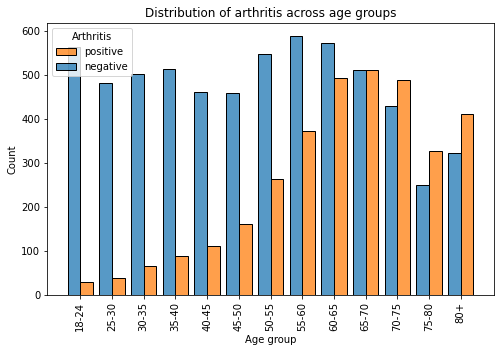

In [79]:
# create a plot to show the arthritis by age
plt.figure(figsize=(8, 5))
# remove the value 14, which has no meaning 
sns.histplot(data=df2[df2['age_5yr']!=14], x= 'age_5yr', hue='arthritis', 
             multiple="dodge", discrete=True, shrink=.8)
plt.title('Distribution of arthritis across age groups')
plt.xlabel('Age group')
plt.legend(title='Arthritis', loc='upper left', labels=['positive', 'negative'])
plt.xticks(list(range(1, 14, 1)), (['18-24'] + [str(x)+'-'+str(x+5) for x in range(25, 80, 5)] + ['80+']),
           rotation=90)
plt.show()

**Insights:**   
This data suggests a positive correlation between age and the prevalence of arthritis.

Text(0.5, 1.0, 'Distirbution of arthritis in men and women')

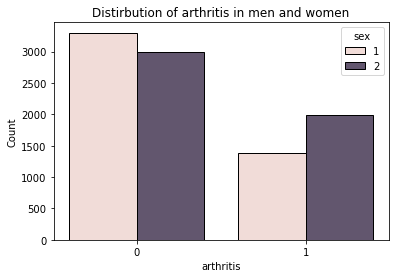

In [89]:
# create a plot for distribution of arthritis by sex
sns.histplot(data=df2, x= 'arthritis', hue='sex', 
             multiple="dodge", discrete=True, shrink=.8)
plt.xticks([0, 1])
plt.title('Distirbution of arthritis in men and women')

The ratio of women to men is higher in the arthritis group compared to the non-arthritis group. However, it remains to be determined whether there is a statistically significant difference in arthritis prevalence between genders. To address this, we will conduct an A/B test next.

## **Hypothesis testing**    

The goal is to conduct a two-sample t-test to check if there is difference of arthritis morbidity between men and women.

Hypotheses:   
- *H`0`:*  There is non difference of arthritis morbidity between men and women.
- *H`A`:*  There is a difference of arthritis morbidity between men and women.

Alpha: 5%


In [24]:
# set the significance level
significance_level = 0.05
significance_level

0.05

In [69]:
# isolate the 'havarth3' column for men and women
men = df2[df2['sex']== 1]['arthritis']
women = df2[df2['sex']== 2]['arthritis']

# perform the t-test
stats.ttest_ind(a=men, b=women, equal_var=False)

Ttest_indResult(statistic=-10.87255487747291, pvalue=2.2429975306866467e-27)

**Conclusion**   

Since the p-value (2.2429975306866467e-27) is smaller than the chosen significance level 5%, we fail to reject the null hypothesis. We conclude that there is no statistical significant difference of arthritis morbidity between men and women at the confidence level of 5%. 

## 3. Model construction

In this stage, we will build Naive Bayes, Logistic regression, Neural, KNN, SVC, and three tree-based models. The chose the model with best performance on test data as the winner.

**Data scaling and spliting for machine learinng**   

Since almost all the variables are categorical, no data scaling needed.

In [27]:
# isolate the outcome va 
X = df2.drop(columns=['arthritis'])   #Fearture Matrix

y = df2['arthritis']                  #Target Variable        

In [28]:
# split data into training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state=1)


### SVC model

In [29]:
# instantiate a svc model
svc = SVC(probability=True)
# 
svc_params = {'kernel': ['rbf'],
              'C': [5, 10],
              'gamma': [1, 0.1, 0.01],
              'degree': [1] # will be ignored by non 'poly' kernels
             }
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

svc_cv = GridSearchCV(svc, svc_params, scoring= scoring, refit='recall', verbose=3)
svc_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END C=5, degree=1, gamma=1, kernel=rbf; accuracy: (test=0.649) f1: (test=0.288) precision: (test=0.495) recall: (test=0.203) roc_auc: (test=0.606) total time=  18.2s
[CV 2/5] END C=5, degree=1, gamma=1, kernel=rbf; accuracy: (test=0.643) f1: (test=0.285) precision: (test=0.475) recall: (test=0.203) roc_auc: (test=0.615) total time=  18.9s
[CV 3/5] END C=5, degree=1, gamma=1, kernel=rbf; accuracy: (test=0.641) f1: (test=0.269) precision: (test=0.466) recall: (test=0.189) roc_auc: (test=0.605) total time=  19.2s
[CV 4/5] END C=5, degree=1, gamma=1, kernel=rbf; accuracy: (test=0.650) f1: (test=0.279) precision: (test=0.500) recall: (test=0.193) roc_auc: (test=0.643) total time=  19.5s
[CV 5/5] END C=5, degree=1, gamma=1, kernel=rbf; accuracy: (test=0.637) f1: (test=0.261) precision: (test=0.454) recall: (test=0.183) roc_auc: (test=0.605) total time=  19.6s
[CV 1/5] END C=5, degree=1, gamma=0.1, kernel=rbf; accuracy: (tes

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [5, 10], 'degree': [1], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             refit='recall',
             scoring={'precision', 'accuracy', 'recall', 'f1', 'roc_auc'},
             verbose=3)

In [30]:
svc_cv.best_score_

0.4751650126574415

In [31]:
svc_cv.best_params_

{'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}

### Tree-based models: Decision Tree, Random Forest, XGBoost

**Decision Tree**

In [32]:
# Instantiate a tree classifier
tree = DecisionTreeClassifier(random_state=2)

# set the parameters for tuning
tree_params = {'max_depth': [4, 5, 6, 7, 8, 9, 10, 12, None],
               'min_samples_leaf': [1, 2, 3, 5, 8, 12, 16, 20]}

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate the GridSearch
tree_cv = GridSearchCV(tree,
                   tree_params,
                   scoring = scoring,
                   cv=5,
                   refit="recall")

# Fit the model
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 12, None],
                         'min_samples_leaf': [1, 2, 3, 5, 8, 12, 16, 20]},
             refit='recall',
             scoring={'precision', 'accuracy', 'recall', 'f1', 'roc_auc'})

In [33]:
tree_cv.best_score_

0.5066929133858269

In [34]:
# Examine the best model from GridSearch
tree_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=16, random_state=2)

In [35]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and a fit GridSearchCV model object.
    Returns a pandas df with the F1, recall, precision, 'roc_auc', and accuracy scores for the 
    model with the best mean F1 score across all validation folds.
    '''
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]
    
    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    auc = best_estimator_results.mean_test_roc_auc 
    
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy],
                          'AUC': [auc]
                         }
                        )
    return table

**Random Forest**

In [36]:
# Instantiate a random forest model
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6, 'auto'],
            
             'max_samples': [0.7],
             'min_samples_leaf': [1, 2],
             'min_samples_split': [2, 3],
             'n_estimators': [200, 300, 500],
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [37]:
%%time
rf_cv.fit(X_train, y_train)

Wall time: 11min 47s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None],
                         'max_features': [0.3, 0.6, 'auto'],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 300, 500]},
             refit='recall',
             scoring={'precision', 'accuracy', 'recall', 'f1', 'roc_auc'})

In [38]:
rf_cv.best_score_

0.5098580502880927

In [39]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

**XGBoost**

In [40]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12, None],
             'min_child_weight': [2, 3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [200, 300, 400]
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [41]:
%%time
xgb_cv.fit(X_train, y_train)

Wall time: 5min 36s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num

In [42]:
xgb_cv.best_score_

0.5291788970165712

In [43]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 2,
 'n_estimators': 200}

In [44]:
# compare three tree-based models
results = pd.concat([make_results('SVC', svc_cv), 
                     make_results('Decision tree', tree_cv), 
                     make_results('Random forest', rf_cv),
                     make_results('XGboost', xgb_cv)], axis=0).reset_index(drop=True)
results

,Model,F1,Recall,Precision,Accuracy,AUC
0,SVC,0.534750,0.475165,0.611764,0.710937,0.736232
1,Decision tree,0.546159,0.506693,0.596612,0.706523,0.757089
2,Random forest,0.565933,0.503935,0.646164,0.729831,0.782197
3,XGboost,0.571882,0.529179,0.622563,0.723073,0.779202


In [45]:
def get_test_scores(models: dict, model_name:str, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    y_pred = models[model_name].predict(X_test_data)
    y_pred_prob = models[model_name].predict_proba(X_test_data)[:, 1]
    
    accuracy = accuracy_score(y_test_data, y_pred)
    precision = precision_score(y_test_data, y_pred)
    recall = recall_score(y_test_data, y_pred)
    f1 = f1_score(y_test_data, y_pred)
    roc_auc = roc_auc_score(y_test_data, y_pred_prob)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [roc_auc]
                          })

    return table

#### Model Summry

In [46]:
# Define the models
models = {'Naive Bayes': GaussianNB().fit(X_train, y_train),
          'Logistic': LogisticRegression(max_iter=1000).fit(X_train, y_train),
          'Neural': MLPClassifier().fit(X_train, y_train),
          'KNN': KNeighborsClassifier().fit(X_train, y_train),
          'SVC': svc_cv.best_estimator_,
          'Decision tree': tree_cv.best_estimator_,
          'Random forest': rf_cv.best_estimator_,
          'XGboost': xgb_cv.best_estimator_
          }

In [47]:
test_results = pd.DataFrame(columns=['model','precision','recall','F1','accuracy', 'auc'])

for name, model in models.items():
    test_results = pd.concat([test_results, get_test_scores(models, name, X_test, y_test)])

test_results

,model,precision,recall,F1,accuracy,auc
0,Naive Bayes,0.567636,0.530733,0.548564,0.694376,0.739288
0,Logistic,0.566421,0.362884,0.442363,0.679901,0.723875
0,Neural,0.670782,0.385343,0.489489,0.718776,0.722089
0,KNN,0.527407,0.420804,0.468113,0.665426,0.675215
0,SVC,0.617247,0.482270,0.541473,0.714227,0.743400
0,Decision tree,0.615262,0.457447,0.524746,0.710091,0.757325
0,Random forest,0.599156,0.503546,0.547206,0.708437,0.748643
0,XGboost,0.637168,0.510638,0.566929,0.727047,0.776629


AS the above results showed, Naïve Bayes model has the best recall sore as the deciding metrics on the test data, which is about 0.02 higher than that of XGBoost model. However, XGBoost model has the highest scores across all the metrics except recall. 

#### Model visualization   

Predicting performance of the model with best recall score was visualized by confusion matrix. For exploratory purpose, the splits of the decision tree model and the most important features in the random forest model were plotted.

**Confusion Matrix**

In [58]:
# Display the predictions on the test dataset with the random forest model
y_pred = GaussianNB().fit(X_train, y_train).predict(X_test)

<Figure size 504x504 with 0 Axes>

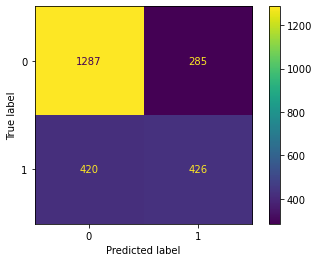

In [60]:
# Create a confusion matrix to visualize the results of the classification model
plt.figure(figsize=(7,7))
# Compute values for confusion matrix
nb_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
nb_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cv_cm, display_labels=rf_cv.classes_)

# Plot confusion matrix
nb_disp.plot()

# Display plot
plt.show()

The model predicts more false negatives than false positives, which means that some survey participant may be identified as not having arthritis, when they actually have arthritis.

In [59]:
# Create a classification report for the Naïve Bayes model
target_labels = ['non_arthritis', 'arthritis']
print(classification_report(y_test, y_pred, target_names=target_labels))

               precision    recall  f1-score   support

non_arthritis       0.76      0.78      0.77      1572
    arthritis       0.57      0.53      0.55       846

     accuracy                           0.69      2418
    macro avg       0.66      0.66      0.66      2418
 weighted avg       0.69      0.69      0.69      2418



**Decision Tree Splits**

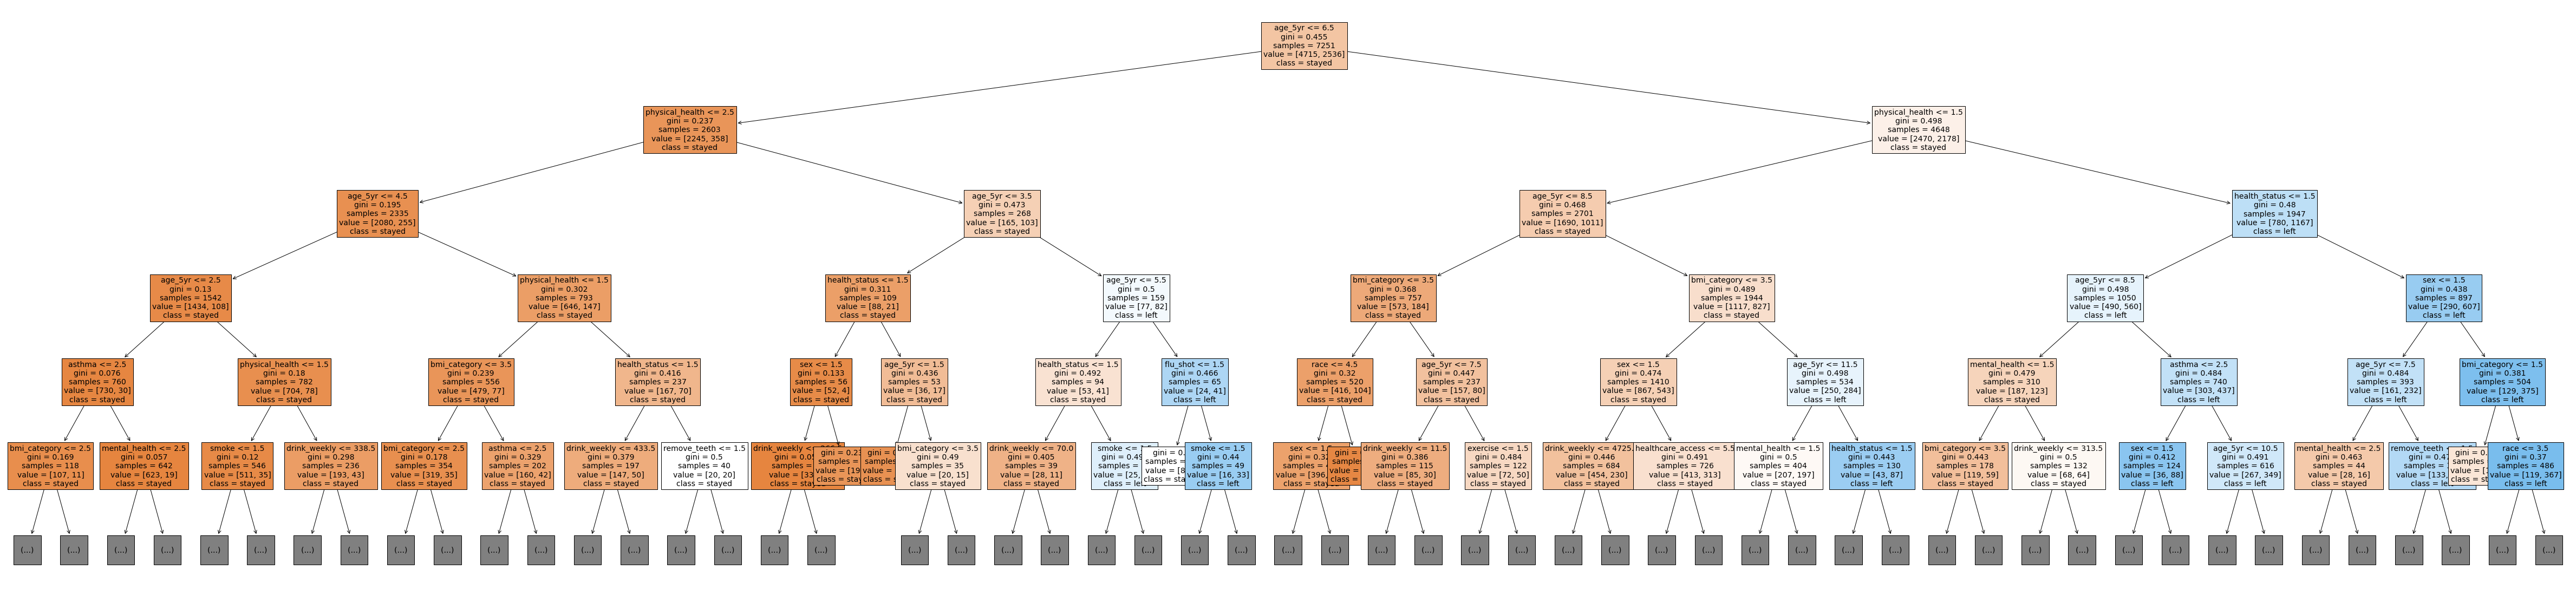

In [51]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree_cv.best_estimator_, max_depth=5, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

**Random Forest feature importance**

In [52]:
# Random Forest feature importance
rf_importances = pd.DataFrame(rf_cv.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
rf_importances = rf_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
rf_importances = rf_importances[rf_importances['gini_importance'] != 0]
rf_importances

,gini_importance
age_5yr,0.240459
drink_weekly,0.159922
physical_health,0.084606
bmi_category,0.069099
mental_health,0.053372
healthcare_access,0.049351
race,0.045993
remove_teeth,0.043636
flu_shot,0.042919
health_status,0.042812


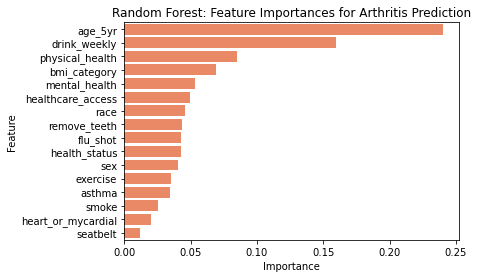

In [53]:
# create a barplot to visualize the random forest feature importances.
sns.barplot(data=rf_importances, x="gini_importance", y=rf_importances.index, orient='h', color='coral')
plt.title("Random Forest: Feature Importances for Arthritis Prediction", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The top 5 predictive features are age, drink weekly, physical health, bmi category, and mental health.

**XGBboost feature importance**

In [54]:
# XGBboost feature importance
xgb_importances = pd.DataFrame(xgb_cv.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
xgb_importances = xgb_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
xgb_importances = xgb_importances[xgb_importances['gini_importance'] != 0]
xgb_importances

,gini_importance
age_5yr,0.247020
physical_health,0.156209
health_status,0.136864
sex,0.067565
healthcare_access,0.055087
bmi_category,0.054177
asthma,0.048163
race,0.037147
mental_health,0.035834
remove_teeth,0.031591


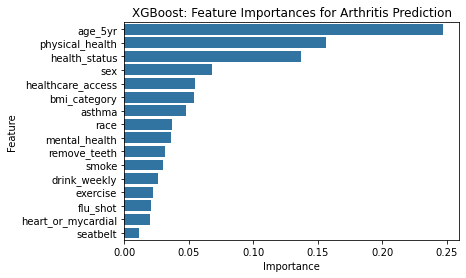

In [55]:
# create a barplot to visualize the XBoost feature importances.
sns.barplot(data=xgb_importances, x="gini_importance", y=xgb_importances.index, orient='h')
plt.title("XGBoost: Feature Importances for Arthritis Prediction", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The top five predictive features in the XGBoost model for arthritis are age, physical health, health status, health access, and BMI category. Consistent with our EDA findings of a strong positive correlation between age and arthritis, age emerges as the most influential predictor in both the random forest and XGBoost models.

Interestingly, while drink_weekly is the second most predictive feature in the random forest model, it ranks among the least important in the XGBoost model for predicting arthritis. This discrepancy warrants further exploration in subsequent analyses.